## 5.7 专题：支持向量机
> 支持向量机(SVM)是非常强大、灵活的有监督学习算法，既可用于分类，也可用于回归。

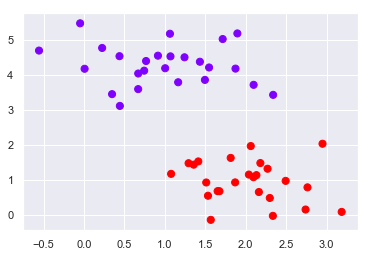

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')

> 线性判别分类器尝试画一条将数据分为两部分的直线，但在该数据中存在不止一条这样的直线，<br>
选择分割线的不同可能会让新的数据点(如下图的'X')分配到不同的标签。

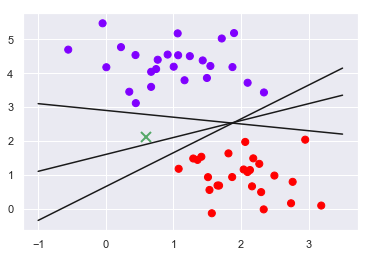

In [2]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plt.plot(0.6,2.1,'x',color='g',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'k')
    

---
### 支持向量机：边界最大化
> 在支持向量机中，选择边界最大的那条线是模型最优解

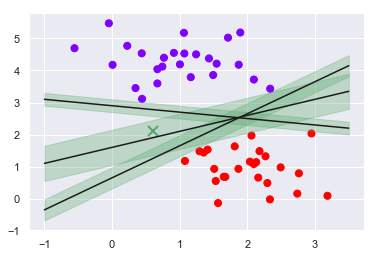

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plt.plot(0.6,2.1,'x',color='g',markeredgewidth=2,markersize=10)
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m*xfit+b
    plt.plot(xfit,yfit,'k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='g',alpha=0.3)
    

#### 1.拟合支持向量机


In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

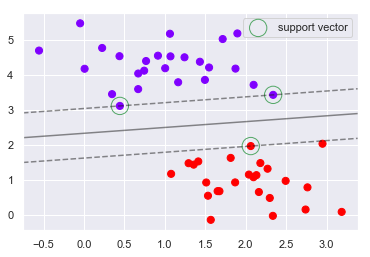

In [5]:
#画出决策边界
def plot_svm_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[-1],30)
    y = np.linspace(ylim[0],ylim[-1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300,marker='o',c='none',edgecolors='g',label='support vector')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.legend(loc='best')

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svm_decision_function(model)

In [6]:
print('---------支持向量---------\n',model.support_vectors_)

---------支持向量---------
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


> 分类器能够成功拟合的关键因素，就是这些支持向量的位置(任何在正确分类一侧远离边界线的点都不会影响拟合效果)

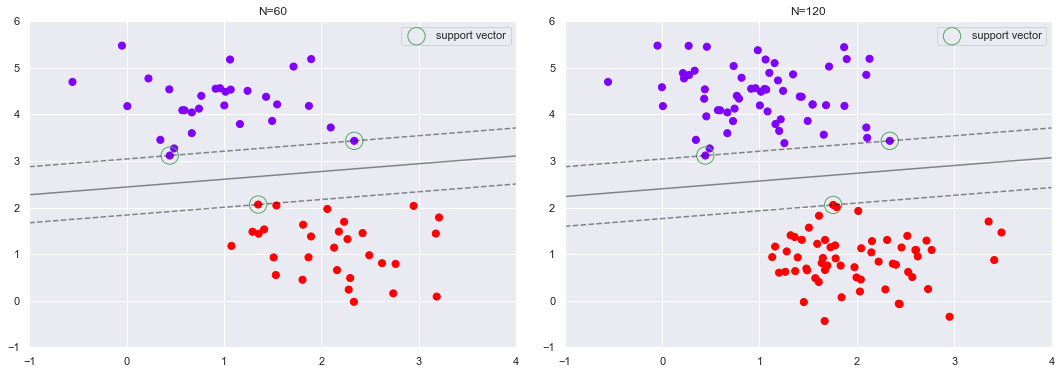

In [7]:
def plot_svm(N=10,ax=None):
    X,y = make_blobs(n_samples=N,centers=2,random_state=0,cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svm_decision_function(model,ax)

fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N=%d'%N)

> 可以发现，在左图中是前60个训练样本的模型和支持向量，右图是前120个训练样本的支持向量，但模型没有改变。<br>
即SVM的优点是对远离边界的数据点不敏感

In [8]:
#使用IPython的交互组件动态观察SVM模型的特点
from ipywidgets import interact,fixed
interact(plot_svm,N=[10,50,90,130,170,210],ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 50, 90, 130, 170, 210), value=10), Output()), _do…

<function __main__.plot_svm(N=10, ax=None)>

#### 2.超越线性边界：核函数SVM模型

No handles with labels found to put in legend.


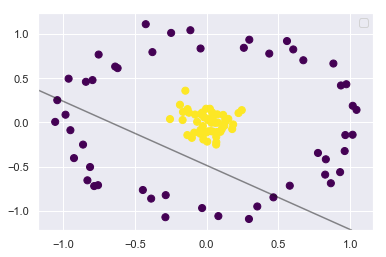

In [9]:
#用线性分类器处理非线性边界
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100,factor=0.1,noise=0.1)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis')
plot_svm_decision_function(clf,plot_support=False)

In [10]:
from mpl_toolkits import mplot3d
#径向基函数
r = np.exp(-(X**2).sum(1))
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='viridis')
    ax.view_init(elev=elev,azim=azim)
    ax.set(xlabel='x',ylabel='y',zlabel='r')

interact(plot_3D,elev=[-90,90],azip=(-180,180),X=fixed(X),y=fixed(y))
    

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.97424695,  0.43249472],
       [-0.03047813,  0.11246004],
       [ 0.43703149,  0.77916431],
       [-0.78355762, -0.72002257],
       [ 0.93087992, -0.56210794],
       [ 0.01040415, -0.10095285],
       [ 0.06784562, -0.22340148],
       [-0.02602975, -0.04069437],
       [-0.44427126, -0.76449176],
       [-0.63724243,  0.63261993],
       [ 0.03888765,  0.11330857],
       [ 0.09643626, -0.10596689],
       [ 0.08217012, -1.05958601],
       [ 0.07537941,  0.09153562],
       [ 1.01807655, -0.13922745],
       [ 0.07187   , -0.10887559],
       [ 0.04227188, -0.10249093],
       [-0.62013907,  0.6146456 ],
       [-0.14792346,  0.35954091],
       [ 0.82674358, -0.59052091],
       [ 0.35350791, -0.95077448],
       [ 0.17859016, -0.07467748],
       [ 0.06088742, -0.00493391],
       [ 0.04250353,  0.04494625],
       [ 0.46607505, -0.84764874],
       [-0.11283444,  1.04368741],
       [ 0.03353087, -0.00333173],
       [

In [11]:
#核函数技巧
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)


C:\Users\WinJX\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

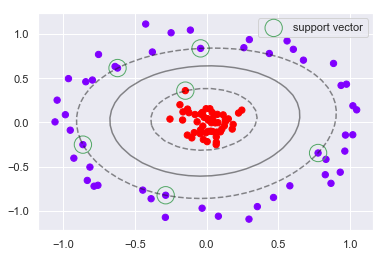

In [12]:
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap='rainbow')
plot_svm_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:,1],
            s=300,lw=1,facecolors='none')

#### 3. SVM优化：软化边界
> 为解决数据重叠的问题，映入修正因子来‘软化’边界，为了取得更好的拟合效果，它允许一些点位于边界线之内.<br>
边界线的硬度可以通过超参数进行控制，通常是C.
* 如果C很大，边界就会很硬，数据点便不能在边界内‘生存’
* 如果C比较小，边界线比较软，有一些数据点就可以穿越边界线

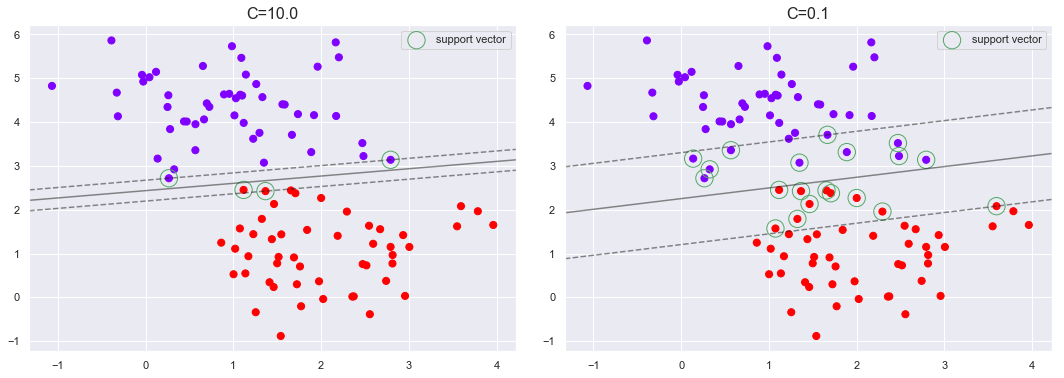

In [13]:
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,C in zip(ax,[10,0.1]):
    model = SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
    plot_svm_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
                model.support_vectors_[:,1],
                s=300,lw=1,facecolors='none')
    axi.set_title('C={:.1f}'.format(C),size=16)


---
### 5.7.3 人脸识别


In [14]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

EOFError: Compressed file ended before the end-of-stream marker was reached

### 5.7.4 支持向量机总结
> 优点：
* 模型依赖的支持向量比较少，说明他们都是非常精致的模型，消耗内存少。
* 一旦模型训练完成，预测阶段的速度非常块。
* 由于模型只受边界线附近的点的影响，因此它们对于高维数据的学习效果非常好，
<br>即使训练比样本维度还高的数据也没有问题。
* 与核函数方法的配合极具通用性，能够适用不同类型的数据。

> 缺点：
* 随着样本量N的不断增加，最差的训练时间复杂度会达到$O(N^3)$ 。<br>经过高效处理后，也只能达到$O(N^2)$，因此大样本学习的计算成本会非常高
* 训练效果非常依赖于边界软化参数C的选择，通常需要通过交叉验证自行搜索，当数据集较大时，计算量也非常大
* 预测结果不能直接进行概率结舌，这一点可以通过内部交叉验证进行评估，但评估过程的计算量也很大
